# ANN model for 1.5 MLD

## >With Dropout of 0.4

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_excel("1.5 MLD (Outlet BOD).xlsx")

# Separate X and y
y = df['STP_Outlet-BOD_U']
x = df.drop('STP_Outlet-BOD_U', axis=1)

# Standardize input features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Build the model
kerasmodel = Sequential()
kerasmodel.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
kerasmodel.add(BatchNormalization())
kerasmodel.add(Dropout(0.4))
kerasmodel.add(Dense(512, activation='sigmoid'))
kerasmodel.add(BatchNormalization())
kerasmodel.add(Dropout(0.4))
kerasmodel.add(Dense(1024, activation='sigmoid'))
kerasmodel.add(BatchNormalization())
kerasmodel.add(Dropout(0.4))
kerasmodel.add(Dense(512, activation='sigmoid'))
kerasmodel.add(BatchNormalization())
kerasmodel.add(Dropout(0.4))
kerasmodel.add(Dense(128, activation='sigmoid'))
kerasmodel.add(Dense(1, activation='linear'))

# Compile the model with a specified learning rate
optimizer = Adam(learning_rate=0.001)
kerasmodel.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = kerasmodel.fit(x_train, y_train, batch_size=30, epochs=300, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Evaluate on testing set
y_pred_test = kerasmodel.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Evaluate on training set
y_pred_train = kerasmodel.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

10/10 [==============================] - 0s 8ms/step


## Printing of Metrics

In [15]:
metrics_df = pd.DataFrame({
    'ANN(MLP Regressor)': ['Training', 'Testing'],
    'Mean Squared Error (MSE)': [mse_train, mse_test],
    'R-squared (R2)': [r2_train, r2_test]
})
# Print the metrics DataFrame
print(metrics_df)


  ANN(MLP Regressor)  Mean Squared Error (MSE)  R-squared (R2)
0           Training                  0.350962        0.806880
1            Testing                  0.608987        0.639913


## Loss curve plot during Training and Testing

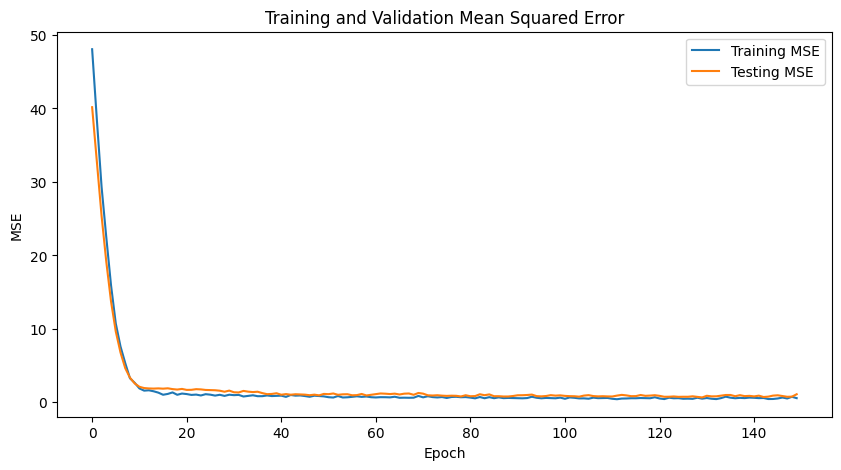

In [16]:
# Plot loss curves during training
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Testing MSE')
plt.title('Training and Validation Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()


## Scatter plot with regression line

C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


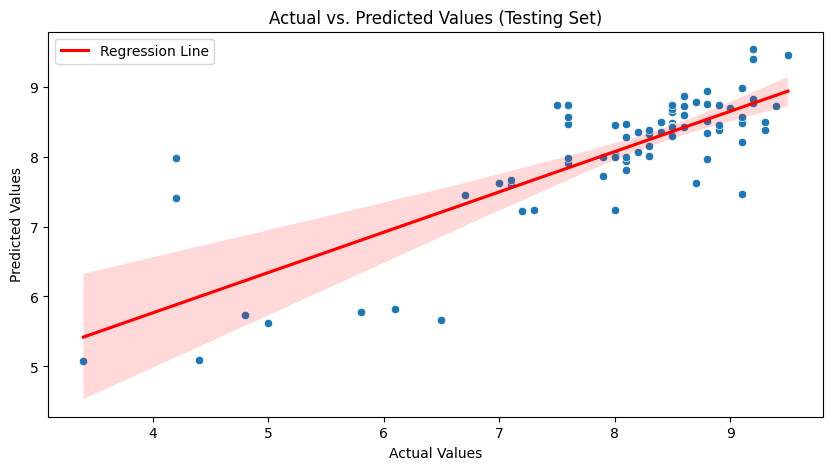

In [17]:
# Scatter plot with regression line
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_test.flatten())
sns.regplot(x=y_test, y=y_pred_test.flatten(), scatter=False, color='red', label='Regression Line')
plt.title('Actual vs. Predicted Values (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()